<a href="https://colab.research.google.com/github/amdadulhaquehasan/Java-MCQ-Quiz-App/blob/main/CNN_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Class Names: ['2750']
Found 21600 images belonging to 1 classes.
Found 5400 images belonging to 1 classes.


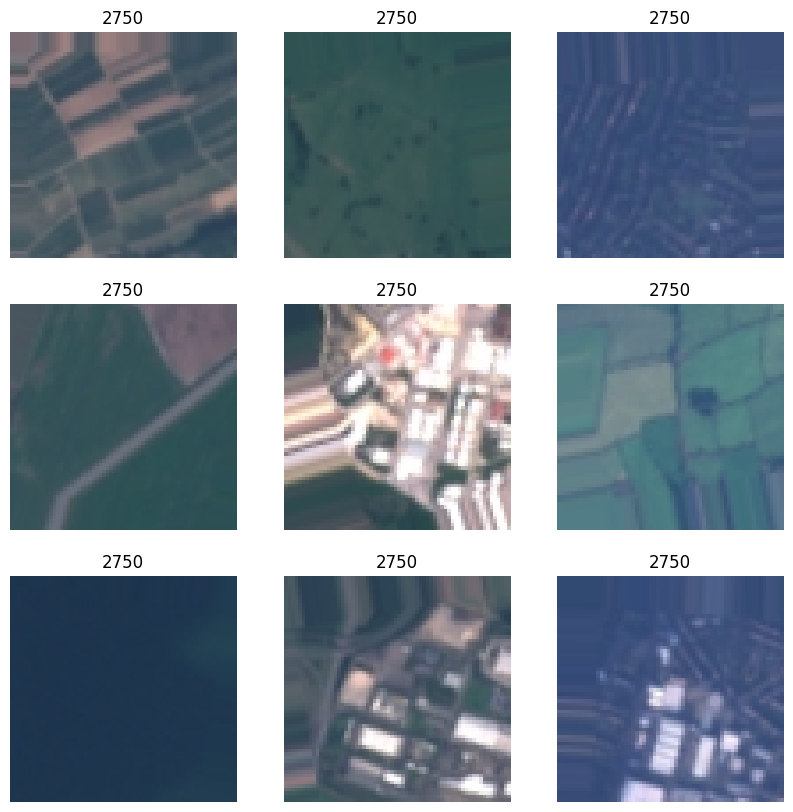

In [21]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set dataset path
data_dir = "/content/EuroSAT.zip"

# Extract the zip file
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall("/content/EuroSAT") # Extract to /content/EuroSAT

# Update data_dir to the extracted folder
data_dir = "/content/EuroSAT"

# Normalizing pixel values between 0 and 1
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


# Define class names
class_names = sorted(os.listdir(data_dir))
print("Class Names:", class_names)

# Load dataset using ImageDataGenerator
target_size = (64, 64)
batch_size = 32

train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Visualizing some images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

# Get a batch of training data
sample_images, sample_labels = next(train_data)
plot_images(sample_images, sample_labels)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━

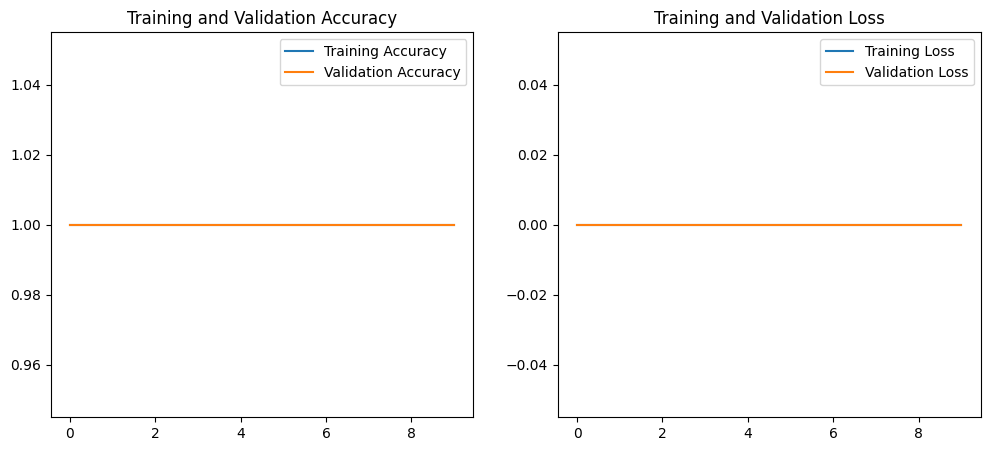

In [28]:
# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')

])
# Printing the model summary
model.summary()

# Compiling the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the CNN model
epochs = 10
history = model.fit(train_data, epochs=epochs, validation_data=val_data)

# Evaluating the performance of the CNN model
test_loss, test_acc = model.evaluate(val_data)
print(f"Test Accuracy: {test_acc:.4f}")

# Plotting the training and validation accuracy and loss values
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

Trial 30 Complete [00h 07m 54s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 52m 20s
Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - acc

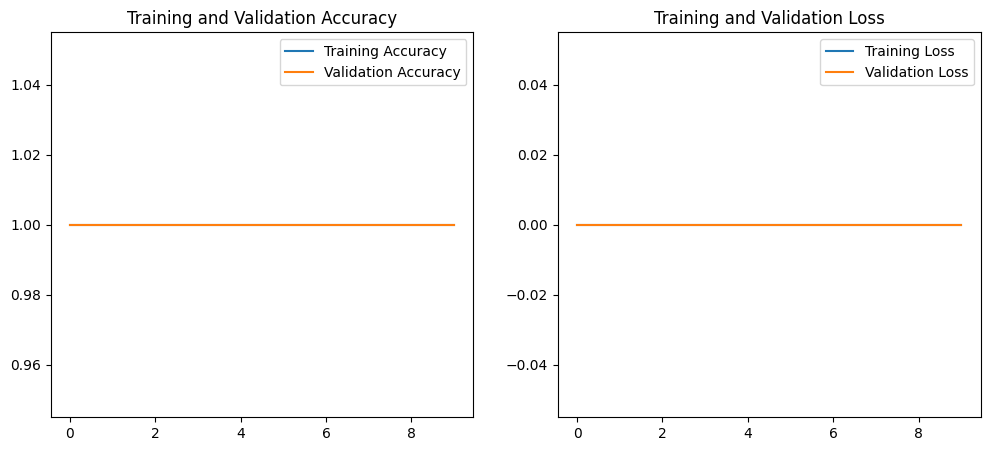

In [29]:
import keras_tuner as kt

# Define a function to build the model
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Choice('conv_units', [32, 64]), (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    for i in range(hp.Choice('num_conv_layers', [1, 2])):  # Limit to max 2 layers
        model.add(layers.Conv2D(hp.Choice(f'conv_units_{i}', [32, 64]), (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    for i in range(hp.Choice('num_dense_layers', [1, 2])):  # Limit to max 2 layers
        model.add(layers.Dense(hp.Choice(f'dense_units_{i}', [64, 128]), activation='relu'))

    model.add(layers.Dropout(hp.Choice('dropout', [0.2, 0.3])))  # Only two options
    model.add(layers.Dense(len(class_names), activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 1e-4])),  # Only two options
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



# Define the Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_results',
    project_name='eurosat_tuning'
)


# Perform the Hyperparameter search
tuner.search(train_data, validation_data=val_data, epochs=10)

# Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best Hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_data, validation_data=val_data, epochs=10)

# Plotting training & validation accuracy and loss values
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 30, 30, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 13, 13, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │         324,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337,721 (1.29 MB)

 Trainable params: 337,721 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━

<ipython-input-30-47b178f174b6>:52: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, max(max(loss), max(val_loss)) * 1.1)  # Adjusted y-axis limit


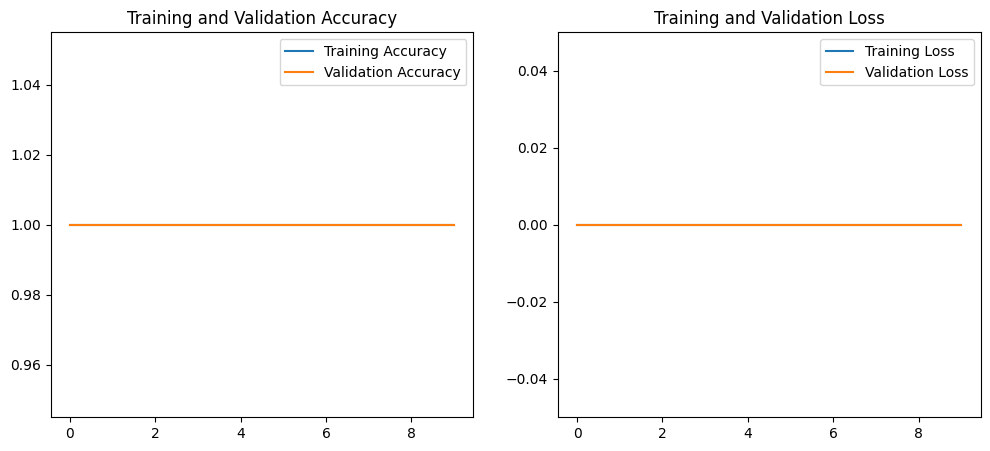

In [30]:
# Building the CNN model (LeNet-5 Architecture)
def build_lenet5():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(64, 64, 3)),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(len(class_names), activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Printing the model summary
model = build_lenet5()
model.summary()

# Training the CNN model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Evaluating the performance of the CNN model
eval_result = model.evaluate(val_data)
print(f"Validation Loss: {eval_result[0]:.4f}, Validation Accuracy: {eval_result[1]:.4f}")

# Plotting training & validation accuracy and loss values
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.ylim(0, max(max(loss), max(val_loss)) * 1.1)  # Adjusted y-axis limit
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)